# Instructions  

All projects require to implement the solution of a system of ordinary differential equations (ODEs)

_dy/dt = f(t,y)_

where t is the independent variable (time) and the solution y(t) is a vector-valued function, with the each component of the vector describing the evolution of the corresponding component of the system.   

Once completed the relevant readings for the specific project, follow these steps for the basic implementation (_except for the neuron firing project)_   

  ## Steps for the basic implementation
  1. Import the python libraries needed
  2. Implement the function f(t,y)
  3. Implement the solution for the system of ODEs
  4. Set up the parameters and run the simulation
  5. Analyse the output, either numerically or graphically

For completing the neuron firing project, look at the instructions in the dedicated [Canvas page](https://canvas.qub.ac.uk/courses/20095/pages/modelling-nerve-cell-signals-in-computational-neuroscience?module_item_id=815279).

All the other projects use the solve_ivp function from the scipy.integrate library. To see how solve_ivp works, refer to the [solve_ivp documentation page linked here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) and to the [example in this repl](https://replit.com/@MTH3024y2023/Example-of-using-the-solveivp-ODE-solver#.lesson/instructions.md).


## Just Some notes on research materials



*   "*In order to establish a link between the terminology used by chemists and those used
by mathematicians, we first analyze the Chapman mechanism under the conditions
that the chemical rates are constant [...] We will
show that the Chapman mechanism has three steady states for the species concentrations but only one of them is found experimentally [3,4], a stable node.*" Stratospheric ozone dynamics according to the Chapman mechanism
*   "The photolytic rates in Eqs. 1 and 3 are denoted by jO2 and jO3 and
depend on the geographical location, the spectral distribution of the radiation coming
from the sun and some optical properties of the atmosphere and the earth (the albedo)." (Discuss the different rates of photodissociation in different regions of Earth?)

# Notes to help with calculations

*   Solid rectangles in figure 1 represent ozone concentrations calculated by equations 9 and values from table 1. These solid rectangles give numerical solutions to Chapman's equations using "Adams' Method". Initial conditions: 4 x 10^12 molecules cm^-3 for ozone and 0.5 x 10^8 molecules cm^-3 for monotomic oxygen. Times (aprox.): t0 = 0s, t1 = 2.5 x 10^6s, t2 = 6.5 x 10^6s, t3 = 9.7 x 10^6s and t4 = 3 x 10^7s
*   Adam's Method or Linear multistep methods is a method of finding numerical solutions to ODEs which aims to gain efficiency by keeping and using the information from previous time steps rather than discarding it (https://en.wikipedia.org/wiki/Linear_multistep_method).
*  Numerical methods using scipy: https://fangohr.github.io/introduction-to-python-for-computational-science-and-engineering/16-scipy.html
*  "Based on their analysis, in their Fig. 3, the authors define a physical region for the initial conditions of the Chapman equations":
         D = {(x, y)|0 ≤ x ≤ f, 0 ≤ 3 y + x ≤ f }. Use to validate our results
1.  Solve equations 5 and 6 with stable conditions (setting equations equal to zero)
2.  Vary initial conditions


# **Base model code for Chapman equations**

[0.00000000e+00 1.02748454e+04 1.05498436e+04 ... 5.24400065e+07
 5.24400065e+07 5.24400065e+07] O
[1.20000000e+17 1.20000000e+17 1.20000000e+17 ... 1.19989705e+17
 1.19989705e+17 1.19989705e+17] O2
[0.00000000e+00 3.59897611e+07 7.19895220e+07 ... 6.86363003e+12
 6.86363004e+12 6.86363004e+12] O3


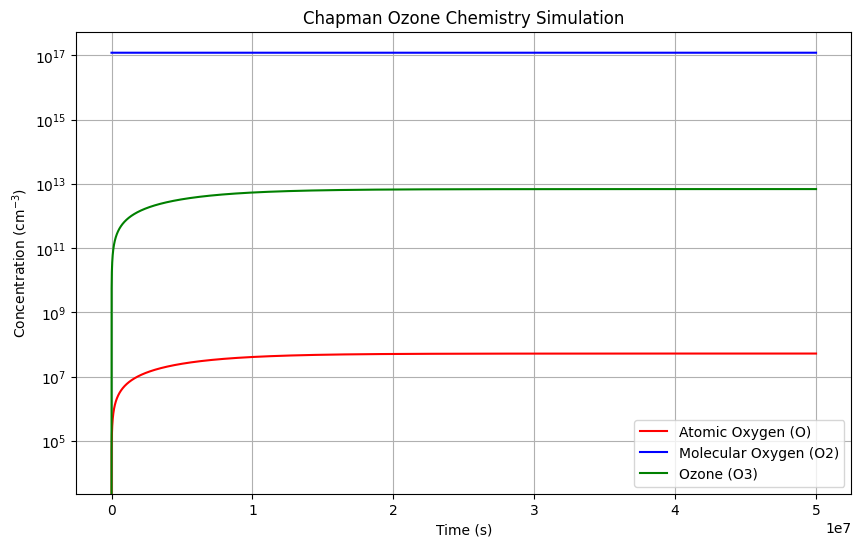

Steady-State Values:
nO = -1.12e-12 cm^-3
nO2 = -8.55e-50 cm^-3
nO3 = -1.60e-43 cm^-3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Constants
jO2 = 3.0e-12  # Photolysis rate of O2 (s^-1)
jO3 = 5.5e-4   # Photolysis rate of O3 (s^-1)
k42 = 1.0e-33  # Rate of O + O2 + M -> O3 + M (cm^6 molecules^-1 s^-1)
k44 = 1.0e-15  # Rate of O + O3 -> 2O2 (cm^3 molecules^-1 s^-1)
nM = 0.6e18    # Concentration of Catalyst M (cm^-3)
f = 0.24e18    # Constant in motion for conservation of atoms in chemical reactions

# solving steady-state concentrations
def steady_state(vars):
    nO, nO2, nO3 = vars
    eq1 = 2 * jO2 * nO2 + jO3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
    eq2 = jO3 * nO3 + 2 * k44 * nO * nO3 - jO2 * nO2 - k42 * nO * nO2 * nM
    eq3 = k42 * nO * nO2 * nM - jO3 * nO3 - k44 * nO * nO3
    return [eq1, eq2, eq3]

# Initial guess for steady-state concentrations
initial_guess = [0, f/2, 0]
nO0, nO2_0, nO3_0 = fsolve(steady_state, initial_guess)

y0 = [nO0, nO2_0, nO3_0]

# Time span for simulation (in seconds)
t_span = (0, 50000000)
t_eval = np.linspace(0, 50000000, 1000000)

# System of differential equations
def fun(t, y):
    nO, nO2, nO3 = y

    dO_dt = 2 * jO2 * nO2 + jO3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
    dO2_dt = jO3 * nO3 + 2 * k44 * nO * nO3 - jO2 * nO2 - k42 * nO * nO2 * nM
    dO3_dt = k42 * nO * nO2 * nM - jO3 * nO3 - k44 * nO * nO3

    return [dO_dt, dO2_dt, dO3_dt]

# Solving ODE system
solution = solve_ivp(fun, t_span, initial_guess, t_eval=t_eval, method='BDF', rtol=1e-6)

# Extracting results
t = solution.t
nO, nO2, nO3 = solution.y

print(nO, "O")
print(nO2, "O2")
print(nO3, "O3")

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(t, nO, label="Atomic Oxygen (O)", color="red")
plt.plot(t, nO2, label="Molecular Oxygen (O2)", color="blue")
plt.plot(t, nO3, label="Ozone (O3)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry Simulation")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

print(f"Steady-State Values:\nnO = {nO0:.2e} cm^-3\nnO2 = {nO2_0:.2e} cm^-3\nnO3 = {nO3_0:.2e} cm^-3")

# **Base model code using simplified version with 2 differential equations**

<ipython-input-5-286498ed6a84>:25: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  nO0, nO3_0 = fsolve(steady_state, initial_guess)


O: [0.00000000e+00 1.02748454e+04 1.05498436e+04 ... 5.24400094e+07
 5.24400094e+07 5.24400094e+07]
O2: [1.20000000e+17 1.20000000e+17 1.20000000e+17 ... 1.19989705e+17
 1.19989705e+17 1.19989705e+17]
O3: [0.00000000e+00 3.59897611e+07 7.19895220e+07 ... 6.86363042e+12
 6.86363042e+12 6.86363042e+12]
Maximum mass conservation error: 0.00e+00


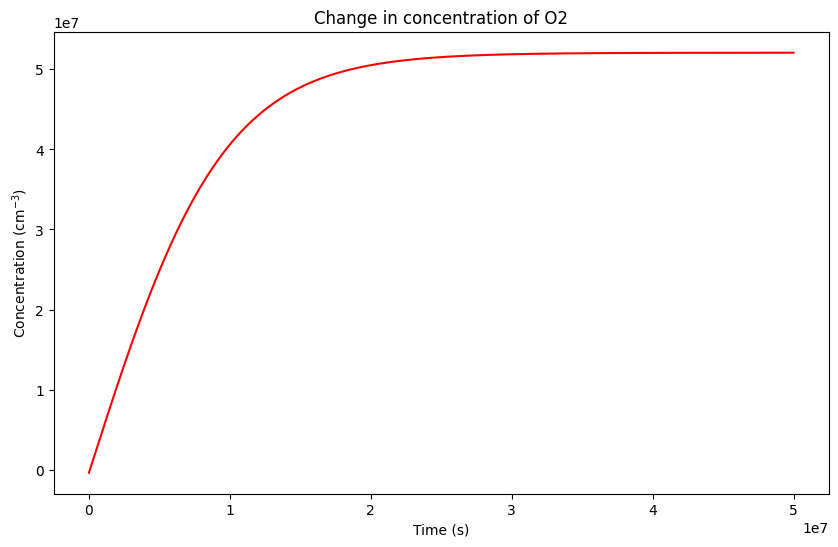

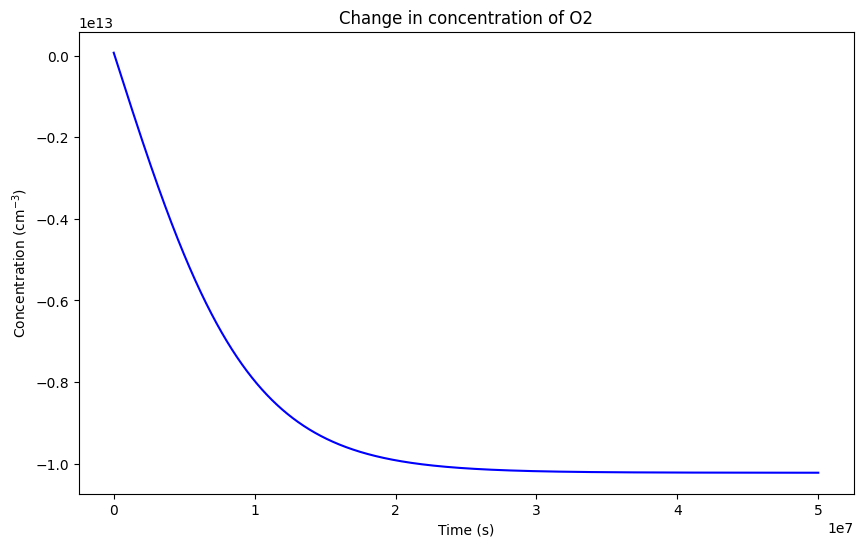

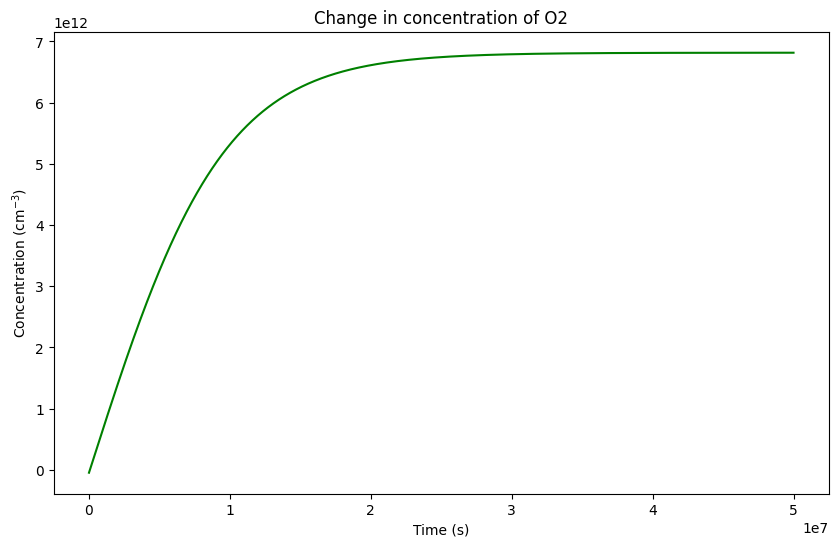

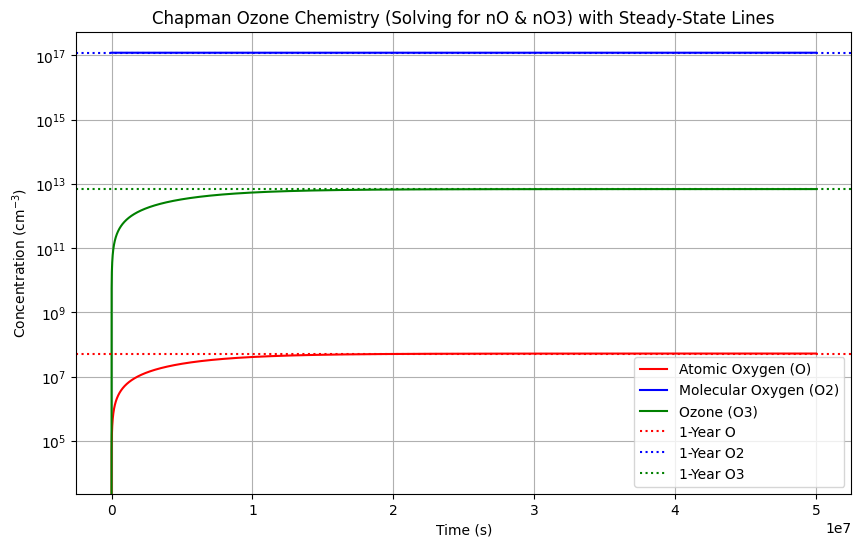

Steady-State Values:
nO  = 3.69e+05 cm^-3
nO2 = 1.20e+17 cm^-3
nO3 = 4.76e+10 cm^-3


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Constants
jO2 = 3.0e-12  # Photolysis rate of O2 (s^-1)
jO3 = 5.5e-4   # Photolysis rate of O3 (s^-1)
k42 = 1.0e-33  # Rate of O + O2 + M -> O3 + M (cm^6 molecules^-1 s^-1)
k44 = 1.0e-15  # Rate of O + O3 -> 2O2 (cm^3 molecules^-1 s^-1)
nM = 0.6e18    # Concentration of third body M (cm^-3)
f = 0.24e18    # Constant in motion for conservation of atoms in chemical reactions

# Steady-state function (solving for nO and nO3)
def steady_state(vars):
    nO, nO3 = vars
    nO2 = (f - nO - 3 * nO3) / 2  # Mass conservation equation

    eq1 = 2 * jO2 * nO2 + jO3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
    eq2 = k42 * nO * nO2 * nM - jO3 * nO3 - k44 * nO * nO3
    return [eq1, eq2]

# Initial guess for (nO, nO3)
initial_guess = [0, 0]
nO0, nO3_0 = fsolve(steady_state, initial_guess)

nO2_0 = (f - nO0 - 3 * nO3_0) / 2
y0 = [nO0, nO3_0]

# ODE system
def fun(t, y):
    nO, nO3 = y
    nO2 = (f - nO - 3 * nO3) / 2

    dO_dt  = 2 * jO2 * nO2 + jO3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
    dO3_dt = k42 * nO * nO2 * nM - jO3 * nO3 - k44 * nO * nO3
    n2 = nO2 - nO2_0
    return [dO_dt, dO3_dt]

# Time in seconds

t_span = (0, 50000000)
t_eval = np.linspace(0, 50000000, 1000000)

solution = solve_ivp(fun, t_span, initial_guess, t_eval=t_eval, method='BDF', rtol=1e-6)

# Extracting results
t = solution.t
nO, nO3 = solution.y
nO2 = (f - nO - 3 * nO3) / 2
n1 = nO - nO0
n2 = nO2 - nO2_0
n3 = nO3 - nO3_0

print("O:", nO)
print("O2:", nO2)
print("O3:", nO3)


# mass conservation checker
mass_check = nO + 2*nO2 + 3*nO3
error = np.max(np.abs(mass_check - f))
print(f"Maximum mass conservation error: {error:.2e}")

# Define one year in seconds
one_year_sec = 3.15e7

# Find the index closest to one year
index_one_year = np.abs(t - one_year_sec).argmin()

# Extracting concentrations at one year
nO_1yr = nO[index_one_year]
nO2_1yr = nO2[index_one_year]
nO3_1yr = nO3[index_one_year]

#plots

plt.figure(figsize=(10, 6))
plt.plot(t, n1, label="Molecular Oxygen (O)", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Change in concentration of O2")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, n2, label="Molecular Oxygen (O2)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Change in concentration of O2")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, n3, label="Molecular Oxygen (O3)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Change in concentration of O2")
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, nO, label="Atomic Oxygen (O)", color="red")
plt.plot(t, nO2, label="Molecular Oxygen (O2)", color="blue")
plt.plot(t, nO3, label="Ozone (O3)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3)")

# Horizontal lines at 1-year concentrations
plt.axhline(y=nO_1yr, color="red", linestyle=":", label="1-Year O")
plt.axhline(y=nO2_1yr, color="blue", linestyle=":", label="1-Year O2")
plt.axhline(y=nO3_1yr, color="green", linestyle=":", label="1-Year O3")


plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3) with Steady-State Lines")
plt.legend(loc="best")
plt.yscale("log")
plt.grid(True)
plt.show()

#steady-state values
print(f"Steady-State Values:\nnO  = {nO0:.2e} cm^-3\nnO2 = {nO2_0:.2e} cm^-3\nnO3 = {nO3_0:.2e} cm^-3")

# **Code containing Time-Dependent Photolysis and Amplitudes**

Estimating the steady state:

Should play around with the initial concentrations of the system to see where it diverges and find a region of stability

The graph shows that the production of atomic oxygen is slow due to the high amount of energy to photolyse the molecular oxygen but atomic oxygen is highly reactive due to their two unpaired electrons and is quick to form ozone. Ozone photolyses quickier to form molecular oxygen and atomic oxygen.

I extended the time out to one year to see if the concentration would end up reaching their steady-states


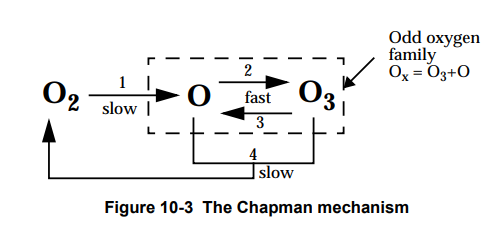
Modelled the intensity of the sun as being sinusoidal during the day and zeroo at night.

<ipython-input-3-97db0750f638>:30: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  nO0, nO3_0 = fsolve(steady_state, initial_guess)


O: [     0.          10004.59873868  10009.35115972 ... 161249.63922161
 161254.39215291 161259.14444763]
O2: [1.2000000e+17 1.2000000e+17 1.2000000e+17 ... 1.1999997e+17 1.1999997e+17
 1.1999997e+17]
O3: [0.00000000e+00 6.12081622e+05 1.23416308e+06 ... 1.97999636e+10
 1.98005857e+10 1.98012078e+10]
Maximum mass conservation error: 0.00e+00


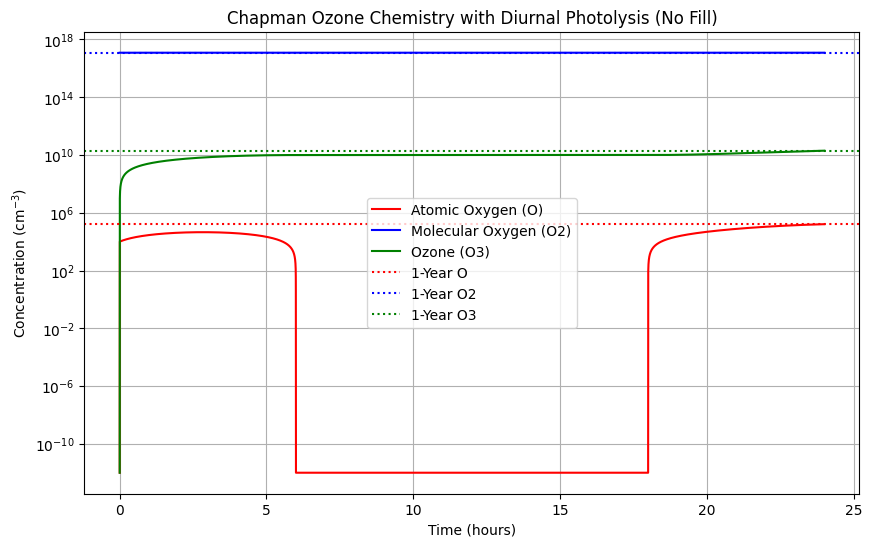

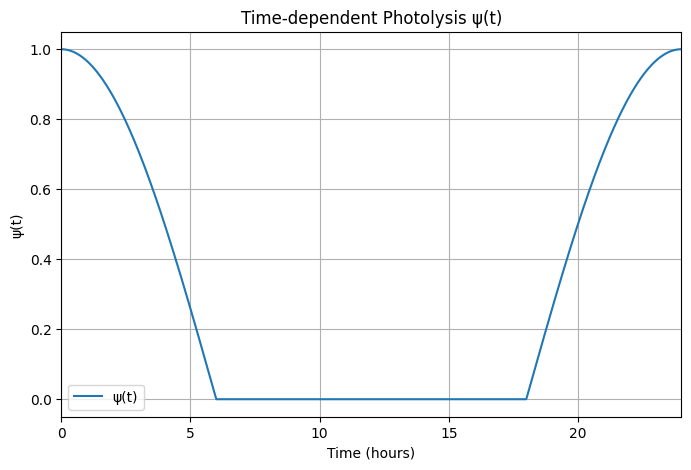

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Constants
jO2 = 3.0e-12  # Photolysis rate of O2 (s^-1)
jO3 = 5.5e-4   # Photolysis rate of O3 (s^-1)
k42 = 1.0e-33  # Rate of O + O2 + M -> O3 + M (cm^6 molecules^-1 s^-1)
k44 = 1.0e-15  # Rate of O + O3 -> 2O2 (cm^3 molecules^-1 s^-1)
nM = 0.6e18    # Concentration of third body M (cm^-3)
f = 0.24e18    # Constant in motion for conservation of atoms in chemical reactions

# Diurnal variability function psi(t)
def psi(t):
    T_day = 86400  # One day in seconds
    return max(np.cos(2 * np.pi * t / T_day), 0)

# Steady-state function (solving for nO and nO3)
def steady_state(vars):
    nO, nO3 = vars
    nO2 = (f - nO - 3 * nO3) / 2  # Mass conservation equation

    eq1 = 2 * jO2 * nO2 + jO3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
    eq2 = k42 * nO * nO2 * nM - jO3 * nO3 - k44 * nO * nO3
    return [eq1, eq2]

# Initial guess
initial_guess = [0, 0]
nO0, nO3_0 = fsolve(steady_state, initial_guess)
nO2_0 = (f - nO0 - 3 * nO3_0) / 2
y0 = [nO0, nO3_0]

# ODE system with time-dependent photolysis
def fun(t, y):
    nO, nO3 = y
    nO2 = (f - nO - 3 * nO3) / 2

    phi = psi(t)
    J_O2 = jO2 * phi
    J_O3 = jO3 * phi

    dO_dt  = 2 * J_O2 * nO2 + J_O3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
    dO3_dt = k42 * nO * nO2 * nM - J_O3 * nO3 - k44 * nO * nO3

    return [dO_dt, dO3_dt]

print("O:", nO)
print("O2:", nO2)
print("O3:", nO3)


# time
t_span = (0, 3e7)
t_eval = np.linspace(0, 86400, 100000)

# solving
solution = solve_ivp(fun, t_span, initial_guess, t_eval=t_eval, method='BDF', rtol=1e-6, atol=1e-8)

# Extracting results
t = solution.t
nO, nO3 = solution.y
nO2 = (f - nO - 3 * nO3) / 2  # Compute nO2 from mass conservation

# Check mass conservation
mass_check = nO + 2*nO2 + 3*nO3
error = np.max(np.abs(mass_check - f))
print(f"Maximum mass conservation error: {error:.2e}")

# Define one year in seconds
one_year_sec = 3.15e7  # seconds

# Find the index closest to one year
index_one_year = np.abs(t - one_year_sec).argmin()

# Extract concentrations at one year
nO_1yr = nO[index_one_year]
nO2_1yr = nO2[index_one_year]
nO3_1yr = nO3[index_one_year]

# times already goes from 0 to 86,400 seconds (24 hours)
times = np.linspace(0, 86400, 1000)
psi_values = [psi(t) for t in times]

# time: from seconds to hours
time_hours = times / 3600.0  # range is 0 to 24

# Clip values to avoid log(0)
epsilon = 1e-12
nO_plot = np.clip(nO, epsilon, None)
nO2_plot = np.clip(nO2, epsilon, None)
nO3_plot = np.clip(nO3, epsilon, None)

# Convert time from seconds to hours:
time_hours = t / 3600.0  # e.g., t=0..86400 => time_hours=0..24

plt.figure(figsize=(10, 6))

# Plot using 'time_hours' instead of 't'
plt.plot(time_hours, nO_plot, color="red", label="Atomic Oxygen (O)",
         linewidth=1.5, fillstyle='none', alpha=1.0)
plt.plot(time_hours, nO2_plot, color="blue", label="Molecular Oxygen (O2)")
plt.plot(time_hours, nO3_plot, color="green", label="Ozone (O3)")

# Your horizontal lines are just y-values, so they don't need an x range
plt.axhline(y=max(nO_1yr, 1e-12), color="red", linestyle=":", label="1-Year O")
plt.axhline(y=max(nO2_1yr, 1e-12), color="blue", linestyle=":", label="1-Year O2")
plt.axhline(y=max(nO3_1yr, 1e-12), color="green", linestyle=":", label="1-Year O3")

plt.xlabel("Time (hours)")  # changed from 'Time (s)'
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry with Diurnal Photolysis (No Fill)")
plt.legend()
plt.yscale("log")
plt.grid(True)
plt.show()

# Optional: Print steady-state values

# # Change the x axis to hours
# print(f"Steady-State Values:\nnO  = {nO0:.2e} cm^-3\nnO2 = {nO2_0:.2e} cm^-3\nnO3 = {nO3_0:.2e} cm^-3")

# times = np.linspace(0, 86400, 1000)
# psi_values = [psi(t) for t in times]
# plt.plot(times, psi_values)
# plt.title("Time-dependent Photolysis ψ(t)")
# plt.xlabel("Time (s)")
# plt.ylabel("ψ(t)")
# plt.grid(True)
# plt.show()

# times already goes from 0 to 86,400 seconds (24 hours)
times = np.linspace(0, 86400, 1000)
psi_values = [psi(t) for t in times]

# time: from seconds to hours
time_hours = times / 3600.0  # range is 0 to 24


plt.figure(figsize=(8, 5))
plt.plot(time_hours, psi_values, label='ψ(t)')

# Limiting the x-axis from 0 to 24 hours
plt.xlim(0, 24)

plt.title("Time-dependent Photolysis ψ(t)")
plt.xlabel("Time (hours)")
plt.ylabel("ψ(t)")
plt.grid(True)
plt.legend()
plt.show()

Different Altitudes with time-dependent photolytic rate.
Table 1 "The values of the photolytic rates were taken from the book by Andrews [4] and correspond to calculated values at mid latitudes under
equinox conditions at noon at a height of 25 km. The value of nM is taken from the standard atmosphere at mid latitudes in the month of March and its value is typical of an altitude of about 27.5 km [8]."

Table 2 "The values of the photolytic rates were taken from Figure 5.5 in the book by Houghton [8], the
variation of the pressure and temperature as a function of the altitude were taken from the standard atmosphere as reported by Seinfeld and Pandis [1], and the values on nM were calculated using the ideal gas law"

Graph of Ozone and altitude included

<ipython-input-10-3c1bb48cdfd7>:45: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  nO0, nO3_0 = fsolve(steady_state, initial_guess)


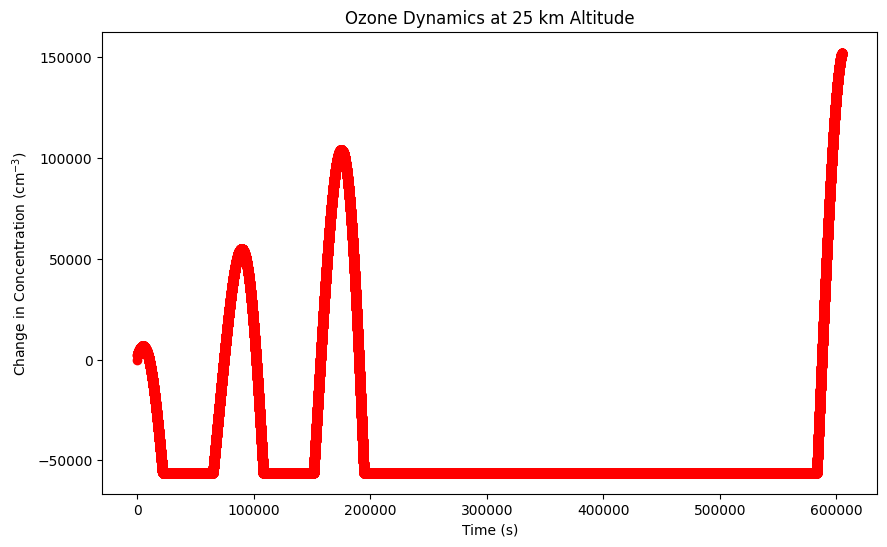

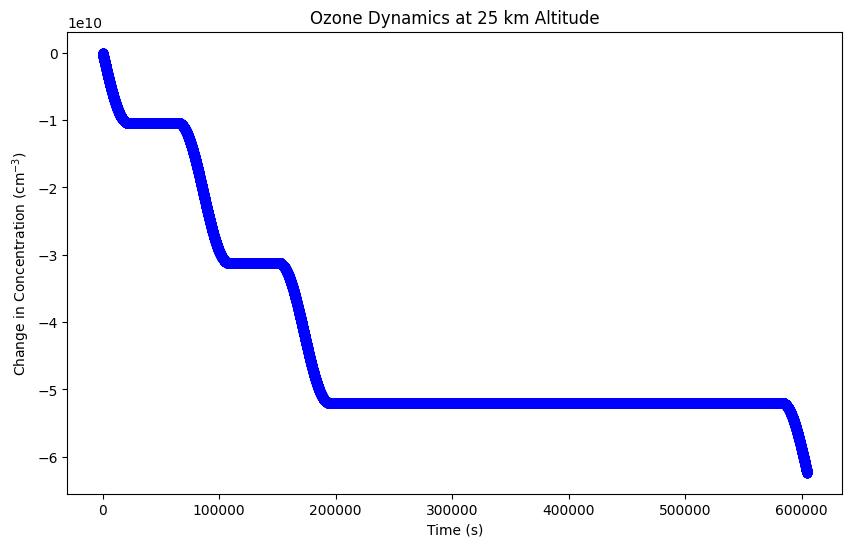

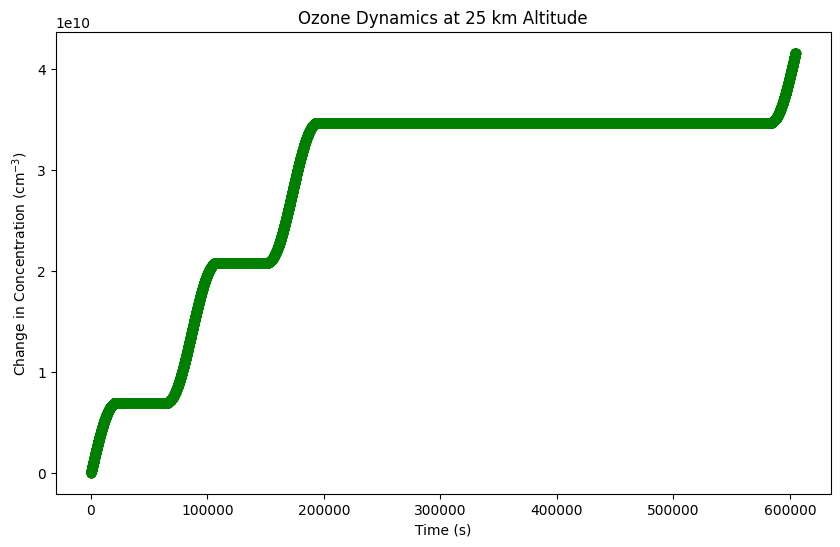

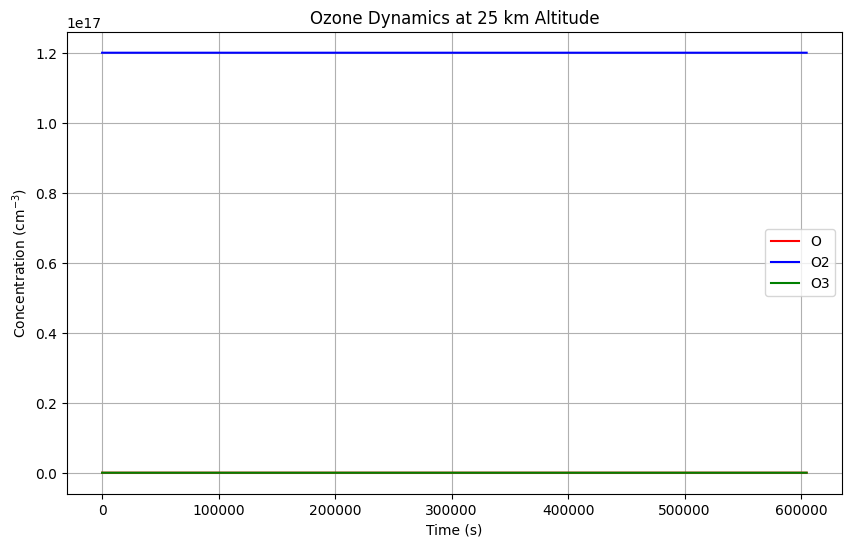

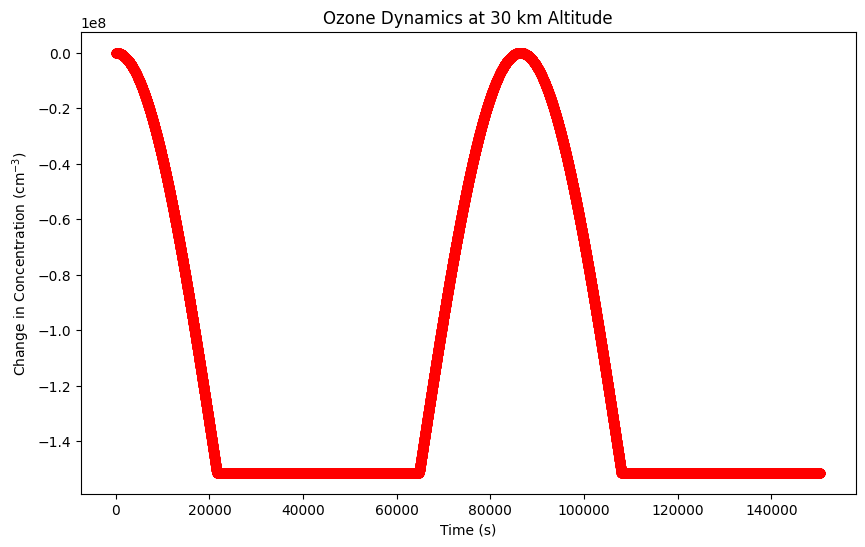

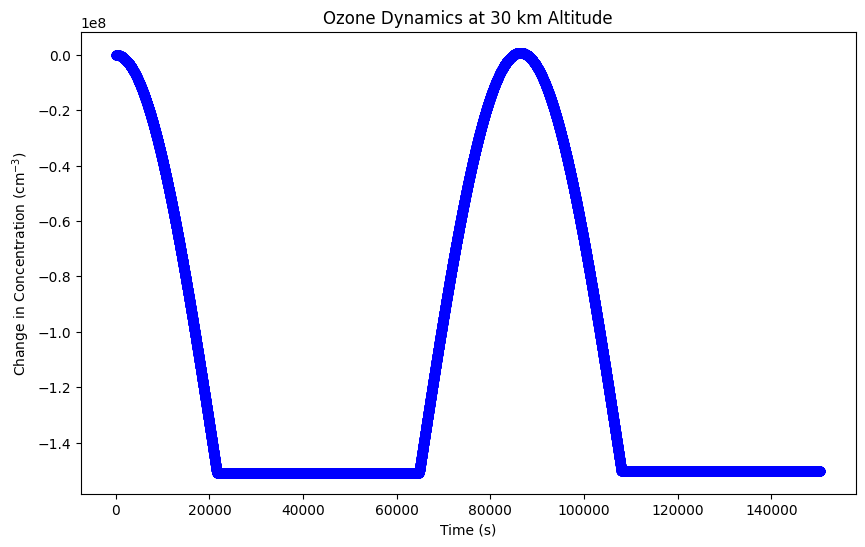

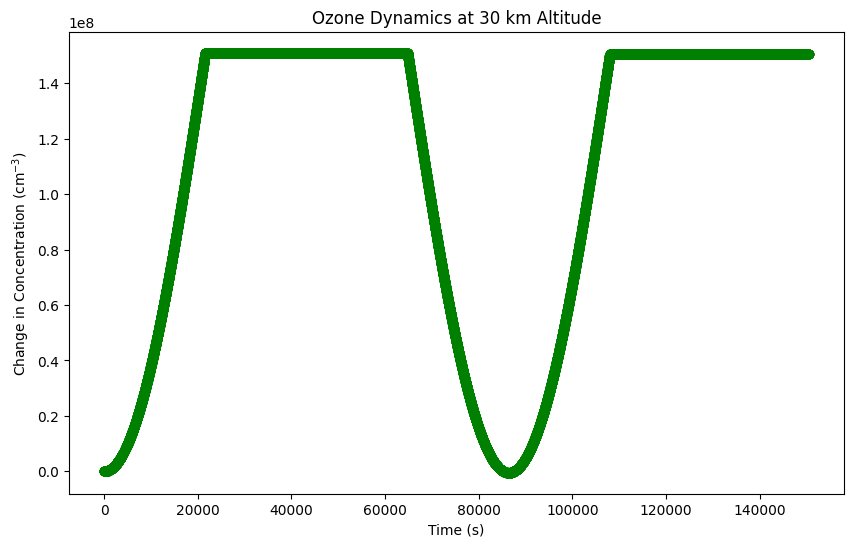

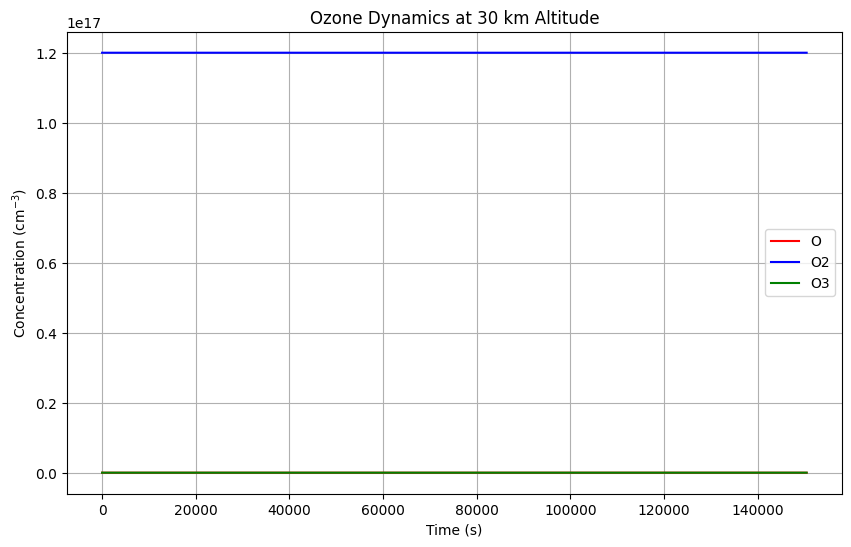

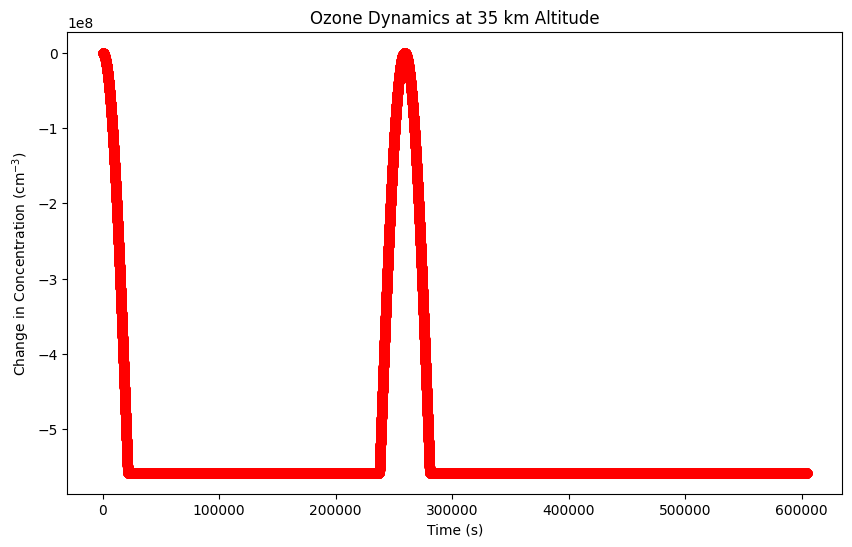

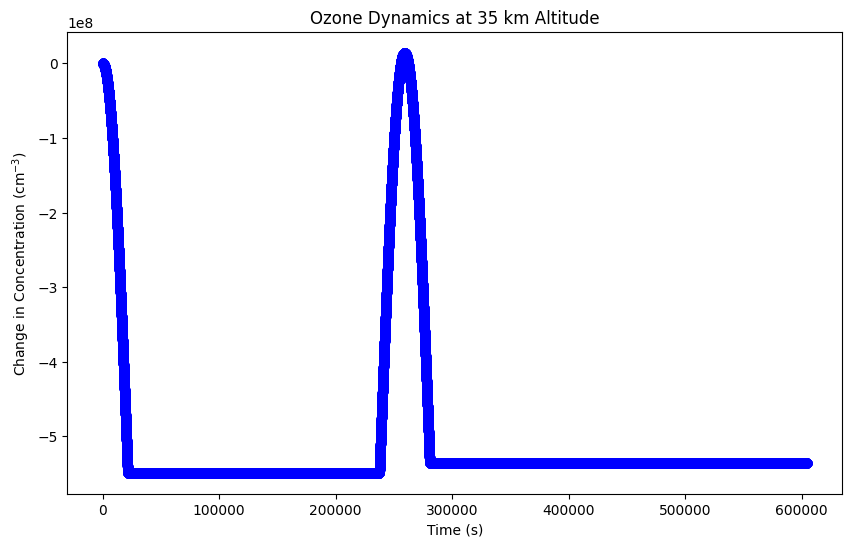

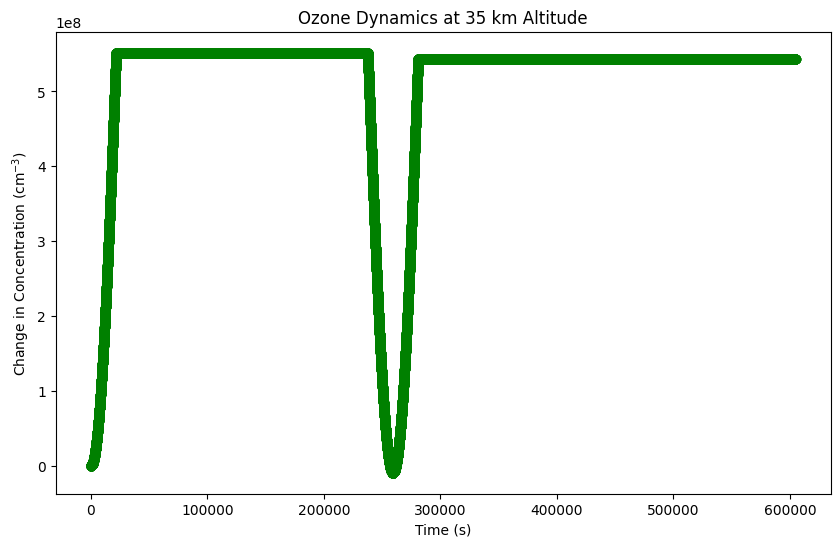

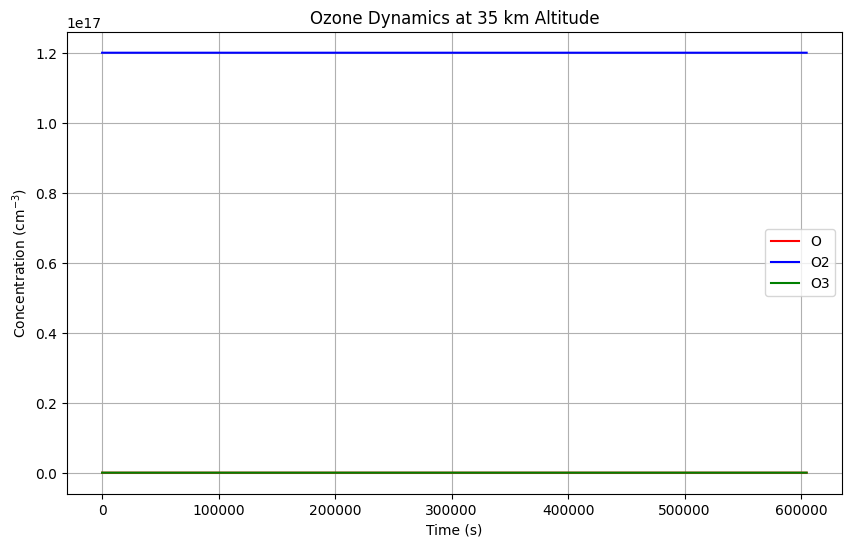

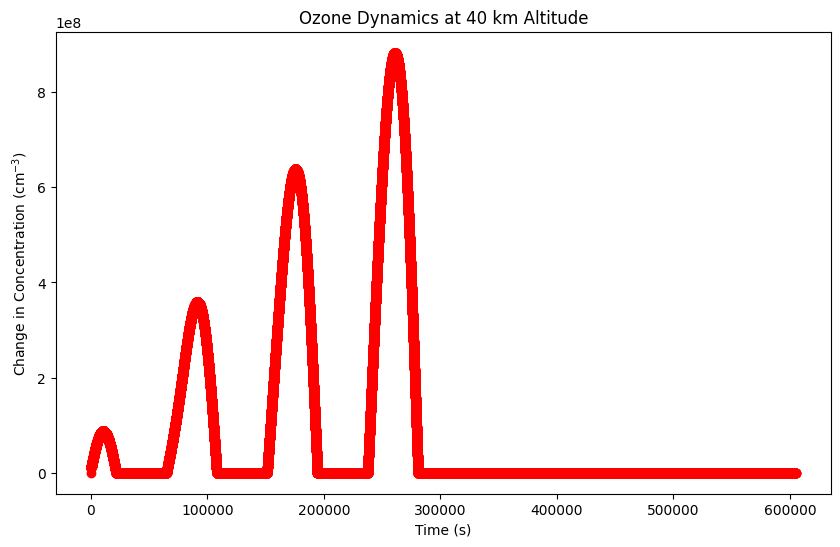

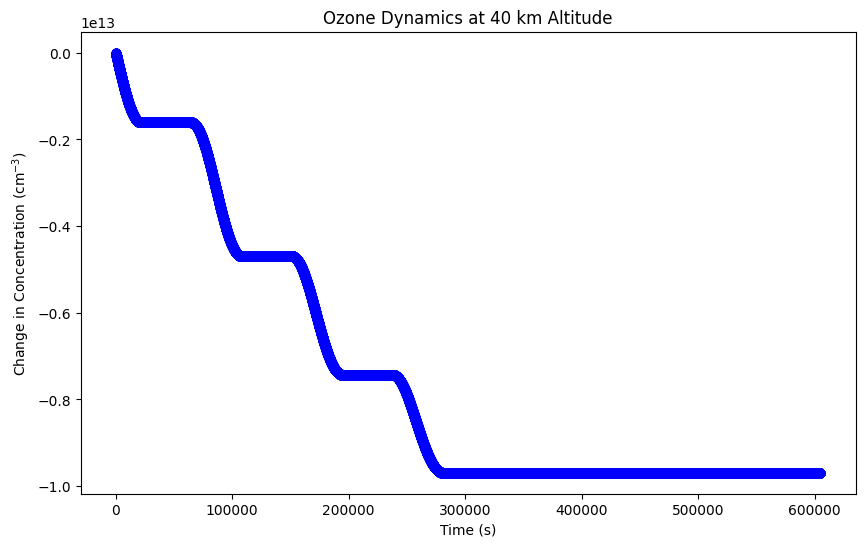

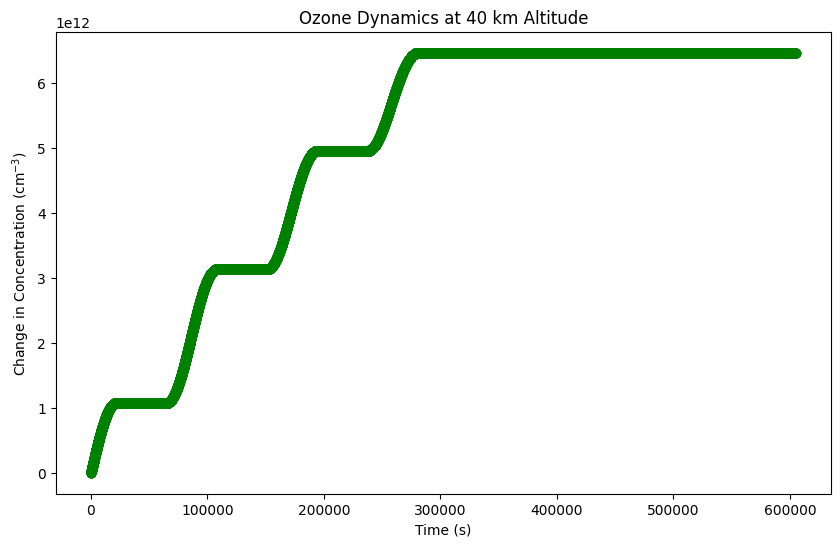

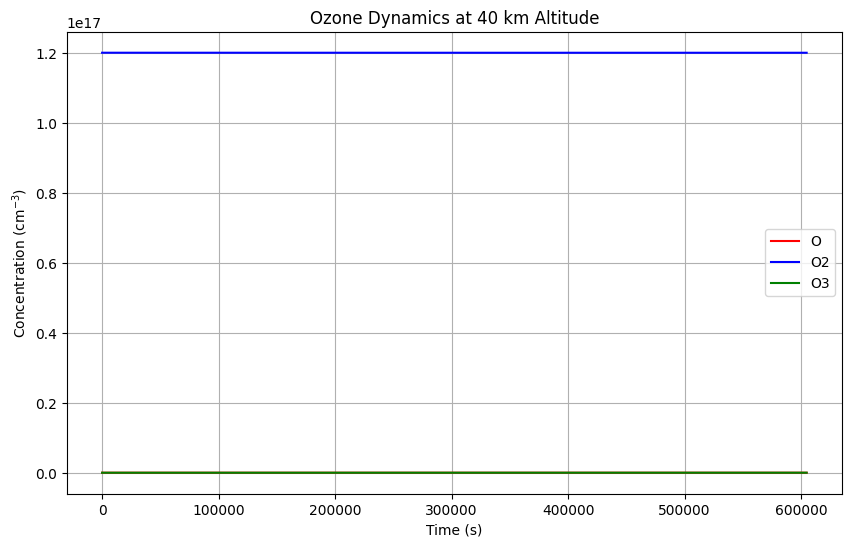

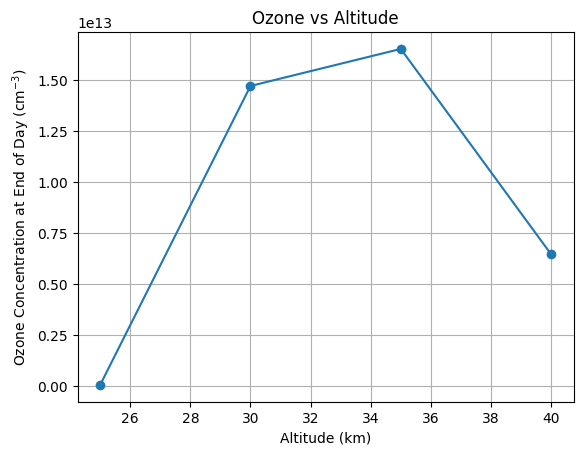

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve


from scipy.optimize import fsolve
# Define a function to return altitude-specific parameters
def get_altitude_params(alt_km):
    # Example data (replace these with Table 2 values from the paper)
    altitude_data = {
        25: {"jO2": 0.021e-10, "jO3": 43.2e-5, "k42": 1.199e-33, "k44": 7.467e-16, "nM": 8.314e17},
        30: {"jO2": 0.170e-10, "jO3": 53.67e-5, "k42": 1.139e-33, "k44": 9.160e-16, "nM": 3.818e17},
        35: {"jO2": 1.032e-10, "jO3": 73.30e-5, "k42": 1.032e-33, "k44": 13.434e-16, "nM": 1.756e17},
        40: {"jO2": 3.262e-10, "jO3": 132.32e-5, "k42": 0.888e-33, "k44": 23.278e-16, "nM": 0.822e17},
        45: {"jO2": 6.469e-10, "jO3": 306.5e-5, "k42": 0.805e-33, "k44": 32.68e-16, "nM": 0.409e17},
        50: {"jO2": 10.316e-10, "jO3": 504.3e-5, "k42": 0.758e-33, "k44": 39.977e-16, "nM": 0.213e17},
    }
    return altitude_data.get(alt_km, altitude_data[30])  # Default to 30 km if altitude not found


def simulate_ozone_dynamics(alt_km):
    # Get parameters for the altitude
    params = get_altitude_params(alt_km)
    jO2 = params["jO2"]
    jO3 = params["jO3"]
    k42 = params["k42"]
    k44 = params["k44"]
    nM = params["nM"]
    f = 0.24e18  # Total conserved atomic oxygen number density (assumed constant)

    # Diurnal function
    def psi(t):
        T_day = 86400
        return max(np.cos(2 * np.pi * t / T_day), 0)

    # Steady-state calculation
    def steady_state(vars):
        nO, nO3 = vars
        nO2 = (f - nO - 3 * nO3) / 2
        eq1 = 2 * jO2 * nO2 + jO3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
        eq2 = k42 * nO * nO2 * nM - jO3 * nO3 - k44 * nO * nO3
        return [eq1, eq2]
    initial_guess = [0, 0]
    nO0, nO3_0 = fsolve(steady_state, initial_guess)

    y0 = [nO0, nO3_0]

    ################
    nO2_0 = (f - nO0 - 3 * nO3_0) / 2
    ################


    def fun(t, y):
        nO, nO3 = y
        nO2 = (f - nO - 3 * nO3) / 2
        phi = psi(t)
        J_O2 = jO2 * phi
        J_O3 = jO3 * phi
        dO_dt = 2 * J_O2 * nO2 + J_O3 * nO3 - k42 * nO * nO2 * nM - k44 * nO * nO3
        dO3_dt = k42 * nO * nO2 * nM - J_O3 * nO3 - k44 * nO * nO3
        N1 = nO - nO0
        N2 = nO2 - nO2_0
        N3 = nO3 - nO3_0
        return [dO_dt, dO3_dt]

    t_span = (0, 3e7)
    t_eval = np.linspace(0, 604800, 100000) # 1 Week
    sol = solve_ivp(fun, t_span, y0, t_eval=t_eval, method='BDF', rtol=1e-6, atol=1e-8)

    # Extract results
    nO, nO3 = sol.y
    nO2 = (f - nO - 3 * nO3) / 2

    N1 = nO - nO0
    N2 = nO2 - nO2_0
    N3 = nO3 - nO3_0

###########
    plt.figure(figsize=(10, 6))
    plt.scatter(sol.t, N1, label="O", color="red")
    #plt.yscale("log")
    plt.xlabel("Time (s)")
    plt.ylabel("Change in Concentration (cm$^{-3}$)")
    plt.title(f"Ozone Dynamics at {alt_km} km Altitude")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(sol.t, N2, label="O", color="blue")
    #plt.yscale("log")
    plt.xlabel("Time (s)")
    plt.ylabel("Change in Concentration (cm$^{-3}$)")
    plt.title(f"Ozone Dynamics at {alt_km} km Altitude")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(sol.t, N3, label="O3", color="green")
    #plt.yscale("log")
    plt.xlabel("Time (s)")
    plt.ylabel("Change in Concentration (cm$^{-3}$)")
    plt.title(f"Ozone Dynamics at {alt_km} km Altitude")
    plt.show()


    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(sol.t, nO, label="O", color="red")
    plt.plot(sol.t, nO2, label="O2", color="blue")
    plt.plot(sol.t, nO3, label="O3", color="green")
    #plt.yscale("log")
    plt.xlabel("Time (s)")
    plt.ylabel("Concentration (cm$^{-3}$)")
    plt.title(f"Ozone Dynamics at {alt_km} km Altitude")
    plt.legend()
    plt.grid(True)
    plt.show()

    return nO3[-1]  # Return final O3 concentration for comparison

altitudes = [25, 30, 35, 40]
final_O3 = []

for alt in altitudes:
    o3_conc = simulate_ozone_dynamics(alt)
    final_O3.append(o3_conc)

# Plot steady-state O3 vs altitude
plt.plot(altitudes, final_O3, marker='o')
plt.xlabel("Altitude (km)")
plt.ylabel("Ozone Concentration at End of Day (cm$^{-3}$)")
plt.title("Ozone vs Altitude")
plt.grid(True)
plt.show()

<ipython-input-11-4352d0b83659>:46: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  nO0_guess, nO3_0_guess = fsolve(steady_state, [0, 0])


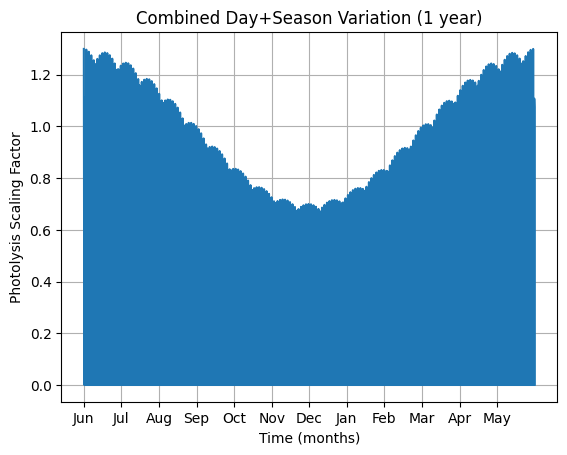

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

jO2 = 3.0e-12  # Base photolysis rate of O2 (s^-1)
jO3 = 5.5e-4   # Base photolysis rate of O3 (s^-1)
k42 = 1.0e-33  # Rate of O + O2 + M -> O3 + M (cm^6 molecules^-1 s^-1)
k44 = 1.0e-15  # Rate of O + O3 -> 2O2 (cm^3 molecules^-1 s^-1)
nM  = 0.6e18   # Concentration of third body M (cm^-3)
f   = 0.24e18  # Constant in motion for conservation of atoms in chemical reactions

# Diurnal + Seasonal Cycle

def phi_total(t):
    """
    Returns the combined diurnal (day/night) + seasonal scaling factor.
    t in seconds.
    """
    # Diurnal cycle: 1 day = 86400 s
    T_day = 86400.0
    daily = max(np.cos(2.0 * np.pi * t / T_day), 0)

    # Seasonal cycle: 1 year ~ 3.156e7 s
    T_year = 3.156e7
    alpha = 0.3  # amplitude of ±30% for seasonal variation
    # If needed, shift phase here (e.g., t0 = 1.7e7 for peak in mid-year)
    t0 = 0.0
    annual = 1.0 + alpha * np.cos(2.0 * np.pi * (t - t0) / T_year)

    return daily * annual
# Steady-state (Chapman)
def steady_state(vars):
    """
    Solve for (nO, nO3) ignoring diurnal/seasonal for a basic guess,
    as in your original approach.
    """
    nO, nO3 = vars
    nO2 = (f - nO - 3.0*nO3) / 2.0

    eq1 = 2.0 * jO2 * nO2 + jO3 * nO3 - k42*nO*nO2*nM - k44*nO*nO3
    eq2 = k42*nO*nO2*nM - jO3*nO3 - k44*nO*nO3
    return [eq1, eq2]

# Initial guess for the steady-state
nO0_guess, nO3_0_guess = fsolve(steady_state, [0, 0])

# ODE system using day+season photolysis

def fun(t, y):
    """
    ODEs for nO, nO3 with time-dependent photolysis (day+season).
    """
    nO, nO3 = y
    nO2 = (f - nO - 3.0*nO3) / 2.0

    # Combined day+season factor
    scale = phi_total(t)
    # Effective photolysis rates
    J_O2 = jO2 * scale
    J_O3 = jO3 * scale

    dO_dt  = 2.0 * J_O2 * nO2 + J_O3 * nO3 - k42*nO*nO2*nM - k44*nO*nO3
    dO3_dt = k42*nO*nO2*nM - J_O3 * nO3 - k44*nO*nO3

    return [dO_dt, dO3_dt]

# Time Parameters
T_year = 3.156e7
T_month = 2.628e6
T_week = 604800
t_span = (0, T_year)

# Changing the Axis to months


# Use the "Chapman only" steady-state guess as initial
y0 = [nO0_guess, nO3_0_guess]

# Evaluate at enough points for smooth plotting
t_span = (0, 3e7)
t_eval = np.linspace(0, T_month * 3, 100000) # 1 Week

solution = solve_ivp(fun, t_span, y0, t_eval=t_eval, method='LSODA',
                     rtol=1e-6, atol=1e-8)

# Extract results
t = solution.t
nO, nO3 = solution.y
nO2 = (f - nO - 3.0*nO3) / 2.0

# Plot results in days
t_days = t / 86400.0  # Convert seconds to days

# plt.figure(figsize=(10,6))
# plt.plot(t_days, nO,  label='Atomic Oxygen (O)',   color='red')
# plt.plot(t_days, nO2, label='Molecular Oxygen (O2)',color='blue')
# plt.plot(t_days, nO3, label='Ozone (O3)',           color='green')

# plt.yscale('log')
# plt.xlabel('Time (days)')
# plt.ylabel('Concentration (cm$^{-3}$)')
# plt.title('Chapman Ozone Chemistry: 1 Year, Diurnal+Seasonal Variation')
# plt.legend()
# plt.grid(True)
# plt.show()

# Plot phi_total
t_plot = np.linspace(0, T_year, 2000)
phi_vals = [phi_total(tp) for tp in t_plot]
plt.figure()

# Convert time to "month index" 0..12
avg_days_per_month = 365.25 / 12.0
seconds_per_month  = 86400.0 * avg_days_per_month
t_months = t_plot / seconds_per_month

month_labels_june = ["Jun", "Jul", "Aug", "Sep", "Oct", "Nov",
                     "Dec", "Jan", "Feb", "Mar", "Apr", "May"]
# 1) Plot your data vs t_months
plt.plot(t_months, phi_vals)

# 2) Create discrete ticks at integer month indices: 0..11
month_indices = np.arange(0, 12, 1)
plt.xticks(month_indices, month_labels_june)
plt.xlabel('Time (months)')
plt.ylabel('Photolysis Scaling Factor')
plt.title('Combined Day+Season Variation (1 year)')
plt.grid(True)
plt.show()

# plt.plot(t_months, phi_vals)
# plt.xlabel('Time (months)')
# plt.ylabel('Photolysis Scaling Factor')
# plt.title('Combined Day+Season Variation (1 year)')
# plt.grid(True)
# plt.show()

# plt.plot(t_plot / 86400.0, phi_vals)
# plt.xlabel('Time (days)')
# plt.ylabel('Photolysis Scaling Factor')
# plt.title('Combined Day+Season Variation (1 year)')
# plt.grid(True)
# plt.show()

# **Code With Extention Implemented (CFCs). Rearranging mass conversion equation for concentration of chlorine**

<ipython-input-1-959ecfb629a2>:31: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  nO_0, nO3_0, nClO_0 = fsolve(steady_state, initial_guess)


Maximum mass conservation error: 0.00e+00
Maximum mass conservation error: 0.00e+00


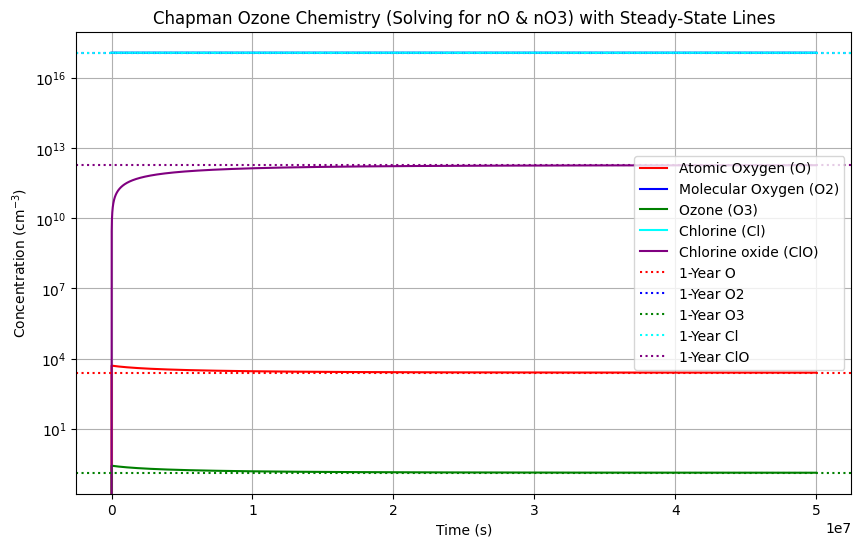

Steady-State Values:
nO  = 3.33e+03 cm^-3
nO2 = 1.20e+17 cm^-3
nO3 = 8.77e-02 cm^-3
nCl = 1.20e+17 cm^-3
nClO = 8.39e+08 cm^-3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Constants
jO2 = 3.0e-12  # Photolysis rate of O2 (s^-1)
jO3 = 5.5e-4   # Photolysis rate of O3 (s^-1)
k42 = 1.0e-33  # Rate of O + O2 + M -> O3 + M (cm^6 molecules^-1 s^-1)
k44 = 1.0e-15  # Rate of O + O3 -> 2O2 (cm^3 molecules^-1 s^-1)
k46 = 1.14e-11 # Rate of Cl + O3 -> ClO + O2 (cm^3 molecules^-1 s^-1)
k47 = 3.86E-11 # Rate of ClO + O -> Cl + O2 (cm^3 molecules^-1 s^-1)
nM = 0.6e18    # Concentration of third body M (cm^-3)
f = 0.24e18    # Constant in motion for conservation of atoms in chemical reactions (Chapman equations)
F = 0.12e18    # Constant in motion for conservation of atoms in chemical reactions (for CFC equations)

# Steady-state function
def steady_state(vars):
    nO, nO3, nClO = vars  # Solve for nO, nO3 and nClO
    nO2 = (f - nO - 3 * nO3) / 2  # Mass conservation
    nCl = F - nClO  # Chlorine conservation (F = nClO + nCl)

    eq1 = jO2 * ((f - nO - 3 * nO3) / 2) + jO3 * nO3 - k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - k44 * nO * nO3 - k47 * nClO * nO
    eq2 = k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - jO3 * nO3 - k44 * nO * nO3 - k46 * nCl * nO3
    eq3 = k46 * nO3 * (F - nClO) - k47 * nClO * nO

    return [eq1, eq2, eq3]

# Initial guess
initial_guess = [0, 0, 0]
nO_0, nO3_0, nClO_0 = fsolve(steady_state, initial_guess)
nO2_0 = (f - nO_0 - 3 * nO3_0) / 2
nCl_0 = F - nClO_0
y0 = [nO_0, nO3_0, nClO_0]

# ODE system
def fun(t, y):
    nO, nO3, nClO = y
    nO2 = (f - nO - 3 * nO3) / 2
    nCl = F - nClO

    dO_dt = jO2 * ((f - nO - 3 * nO3) / 2) + jO3 * nO3 - k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - k44 * nO * nO3 - k47 * nClO * nO
    dO3_dt = k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - jO3 * nO3 - k44 * nO * nO3 - k46 * nCl * nO3
    dClO_dt = k46 * nO3 * (F - nClO) - k47 * nClO * nO

    return [dO_dt, dO3_dt, dClO_dt]

# Time span and solver
t_span = (0, 50000000)
t_eval = np.linspace(0, 50000000, 1000000)
solution = solve_ivp(fun, t_span, initial_guess, t_eval=t_eval, method='LSODA', rtol=1e-6, atol=1e-8)

t = solution.t
nO, nO3, nClO = solution.y
nO2 = (f - nO - 3 * nO3) / 2
nCl = F - nClO

# Mass conservation check
mass_check1 = nO + 2*nO2 + 3*nO3
mass_check2 = nClO + nCl
error = np.max(np.abs(mass_check1 - f))
print(f"Maximum mass conservation error: {error:.2e}")
error = np.max(np.abs(mass_check2 - F))
print(F"Maximum mass conservation error: {error:.2e}")

# Define one year in seconds
one_year_sec = 3.15e7  # seconds

# Find the index closest to one year
index_one_year = np.abs(t - one_year_sec).argmin()

# Extract concentrations at one year
nO_1yr = nO[index_one_year]
nO2_1yr = nO2[index_one_year]
nO3_1yr = nO3[index_one_year]
nCl_1yr = nCl[index_one_year]
nClO_1yr = nClO[index_one_year]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, nO, label="Atomic Oxygen (O)", color="red")
plt.plot(t, nO2, label="Molecular Oxygen (O2)", color="blue")
plt.plot(t, nO3, label="Ozone (O3)", color="green")
plt.plot(t, nCl, label="Chlorine (Cl)", color="cyan")
plt.plot(t, nClO, label="Chlorine oxide (ClO)", color="purple")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3)")

# Horizontal lines at 1-year concentrations
plt.axhline(y=nO_1yr, color="red", linestyle=":", label="1-Year O")
plt.axhline(y=nO2_1yr, color="blue", linestyle=":", label="1-Year O2")
plt.axhline(y=nO3_1yr, color="green", linestyle=":", label="1-Year O3")
plt.axhline(y=nCl_1yr, color="cyan", linestyle=":", label="1-Year Cl")
plt.axhline(y=nClO_1yr, color="purple", linestyle=":", label="1-Year ClO")

# Labels and formatting
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3) with Steady-State Lines")
plt.legend(loc="best")
plt.yscale("log")
plt.grid(True)
plt.show()

# Optional: Print steady-state values
print(f"Steady-State Values:\nnO  = {nO_0:.2e} cm^-3\nnO2 = {nO2_0:.2e} cm^-3\nnO3 = {nO3_0:.2e} cm^-3\nnCl = {nCl_0:.2e} cm^-3\nnClO = {nClO_0:.2e} cm^-3")

*The Conclusions of the article state that “The numerical computations using Adams’ method show that there are two time scales that need to be considered”. How are those time scales affected by the altitude and/or UV irradiation?*



**Paper on CFC kinetic equations**
[here](https://www.researchgate.net/publication/335607689_MODELING_THE_KINETICS_OF_OZONE_LAYER_DEPLETION_USING_SYSTEMS_OF_ODEs)

Can incorporate into our model to observe how CFC's damage the stratospheric ozone layer

# **Code With Extention Implemented (CFCs). Rearranging mass conversion equation for concentration of CF2Cl2**

<ipython-input-1-f51075351ef1>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  nO_0, nO3_0, nCl_0, nCFC2_0, nClO_0 = fsolve(steady_state, initial_guess)


O: [0.00000000e+00 5.13742270e+03 5.27492178e+03 ... 3.70376695e+07
 3.70376698e+07 3.70376702e+07]
O2: [1.20000000e+17 1.20000000e+17 1.20000000e+17 ... 1.19992728e+17
 1.19992728e+17 1.19992728e+17]
O3: [0.00000000e+00 1.79948806e+07 3.59947610e+07 ... 4.84794578e+12
 4.84794583e+12 4.84794587e+12]
Cl: [0. 0. 0. ... 0. 0. 0.]
ClO: [0. 0. 0. ... 0. 0. 0.]
CFC1: [7.40000000e+09 7.39999994e+09 7.39999989e+09 ... 7.34470772e+09
 7.34470766e+09 7.34470761e+09]
CFC2: [0.00000000e+00 1.11000110e+02 2.22000220e+02 ... 1.10584568e+08
 1.10584679e+08 1.10584789e+08]
Maximum mass conservation error: 0.00e+00
Maximum mass conservation error: 0.00e+00


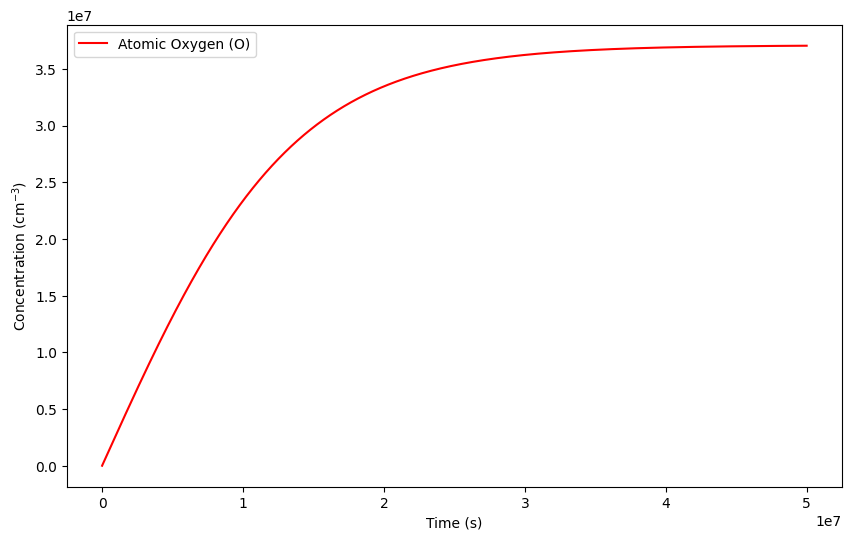

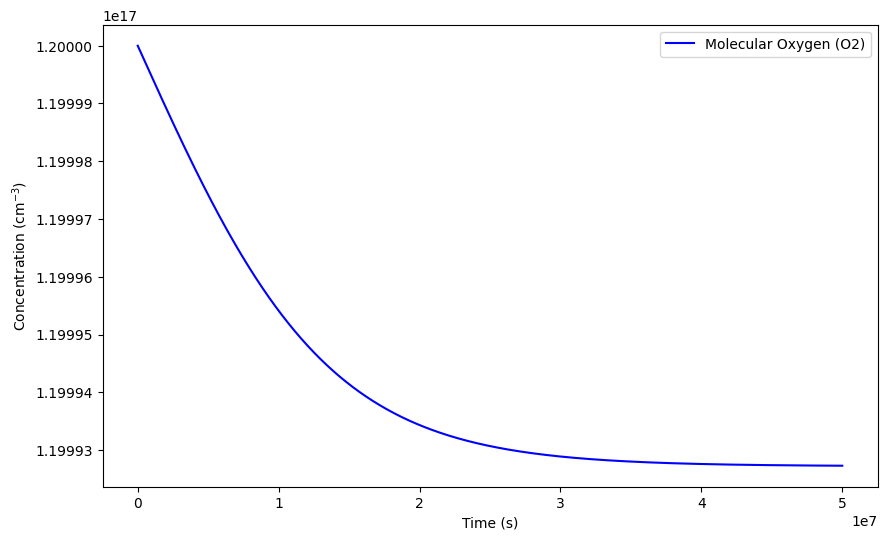

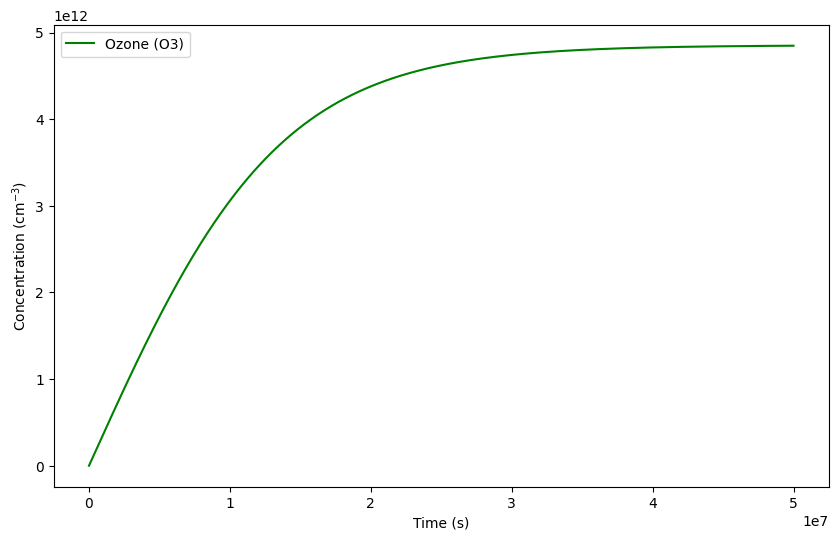

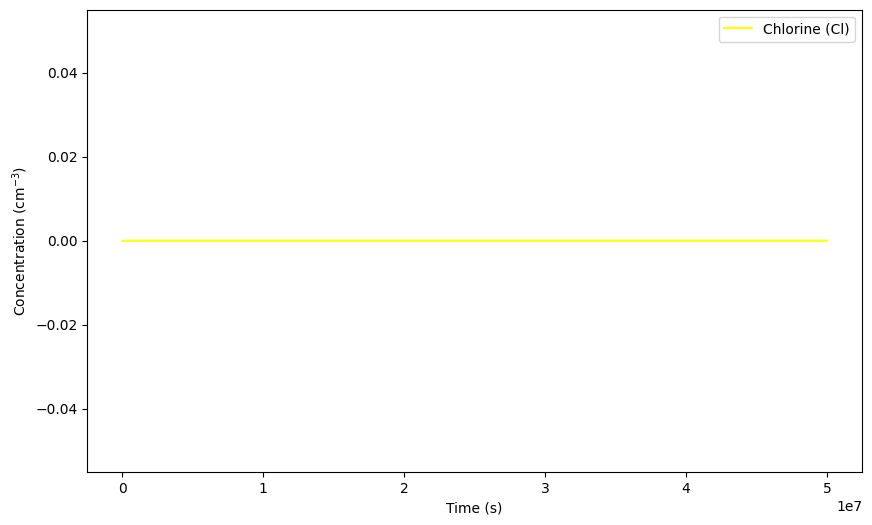

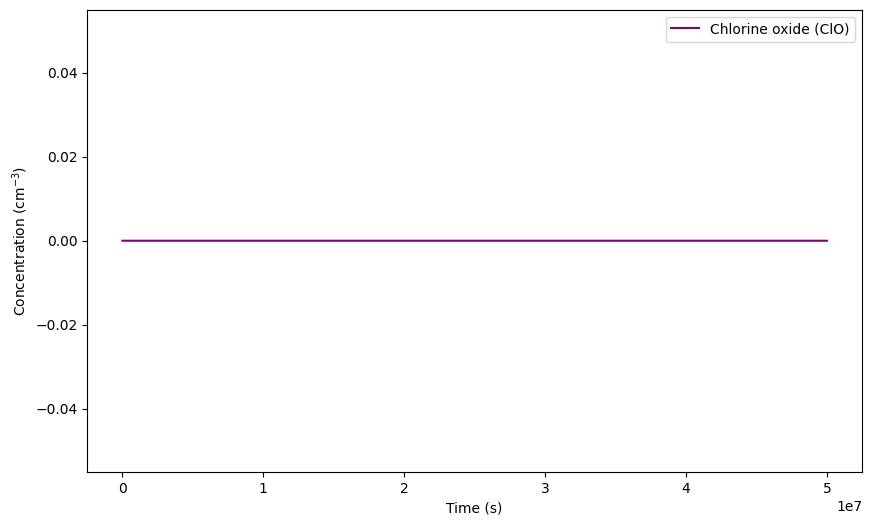

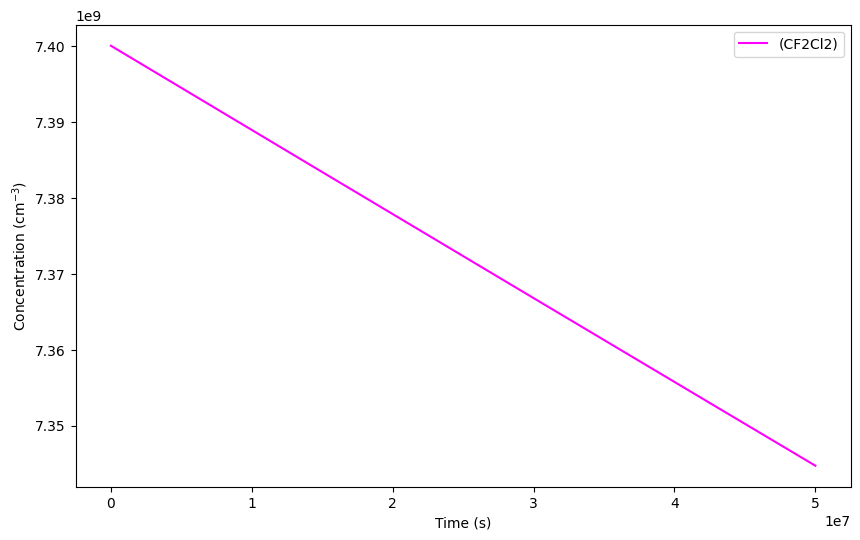

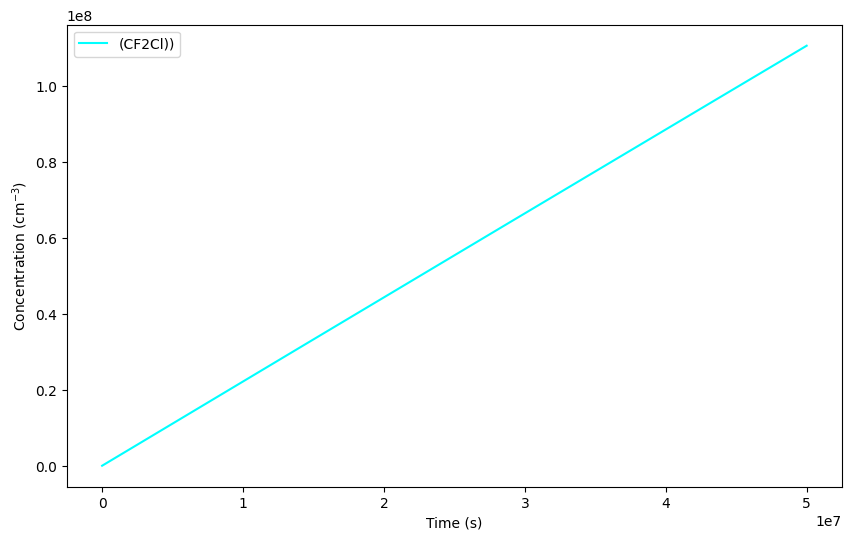

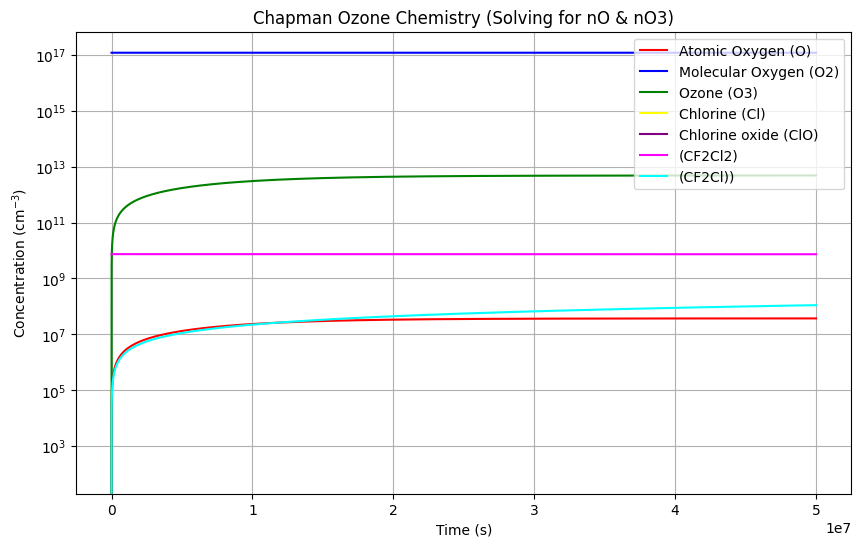

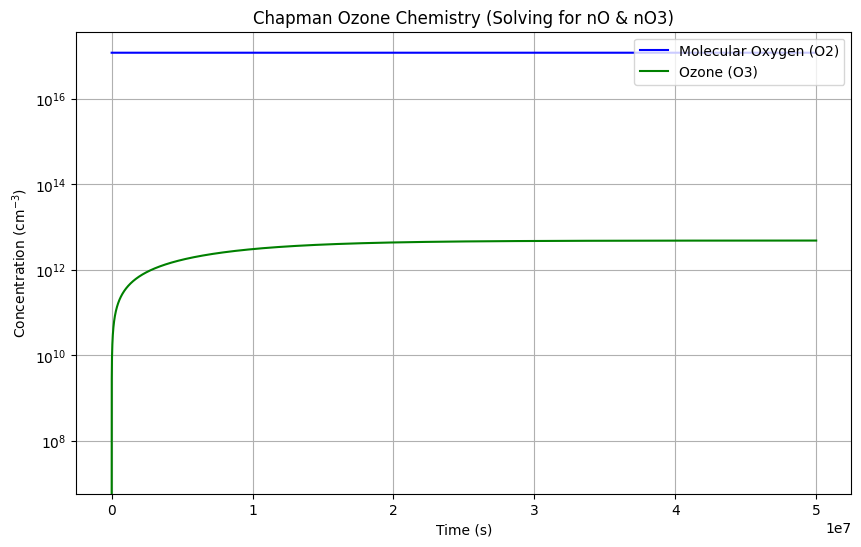

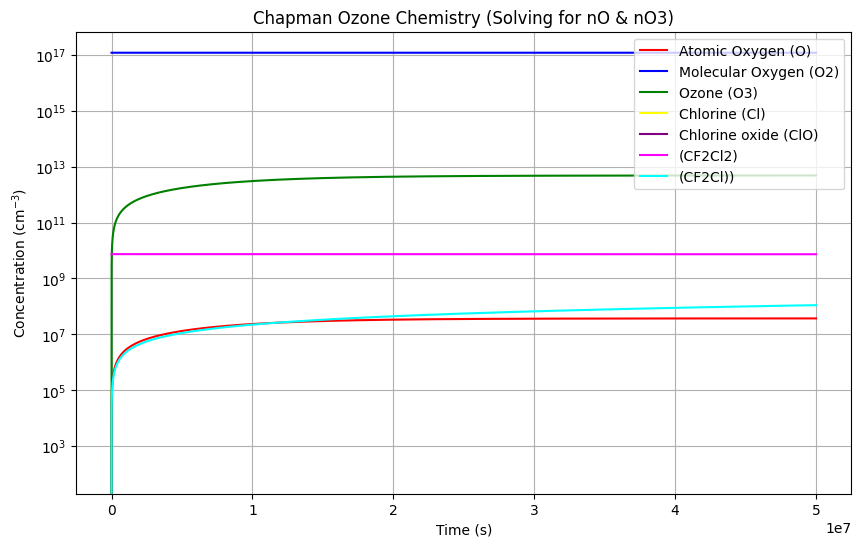

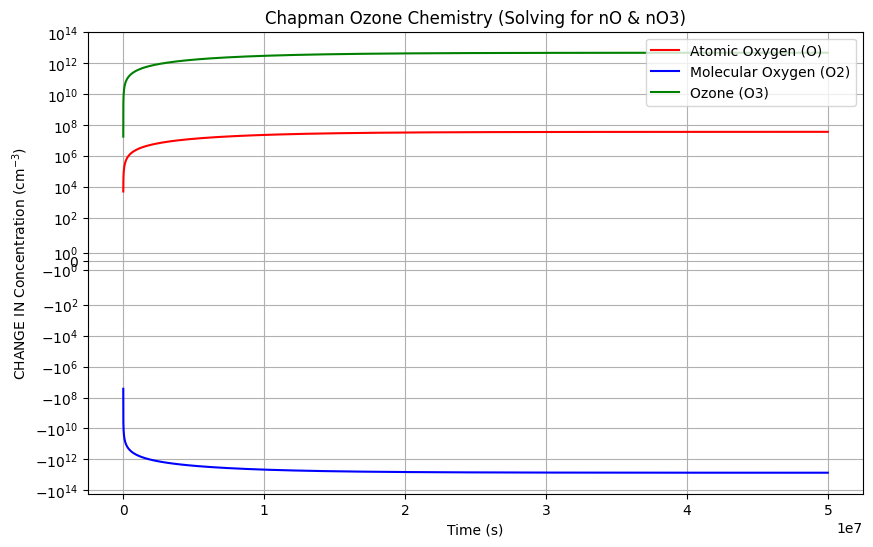

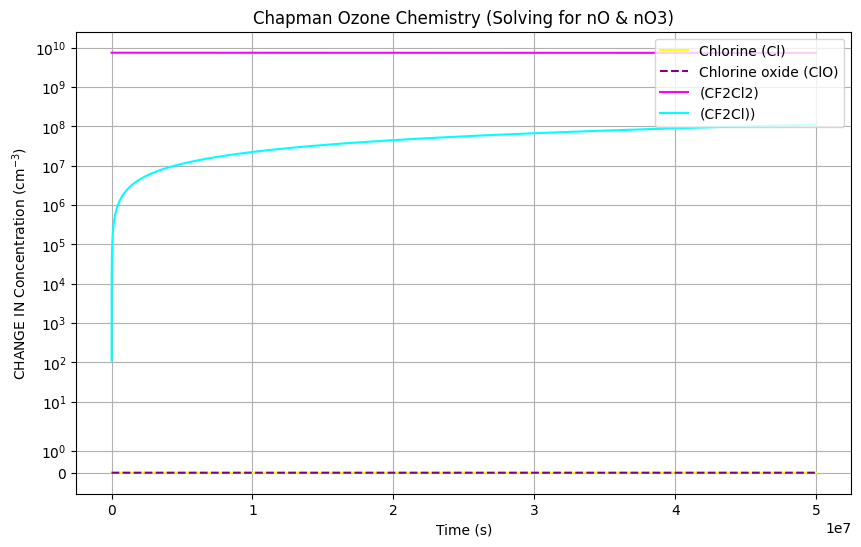

[-9.00001544e+06 -1.80000230e+07 -2.70000305e+07 ... -2.42399141e+12
 -2.42399143e+12 -2.42399145e+12]
Steady-State Values:
nO  = 7.30e+05 cm^-3
nO2 = 1.20e+17 cm^-3
nO3 = 9.52e+10 cm^-3
nCl = 0.00e+00 cm^-3
nClO = 0.00e+00 cm^-3
nCFC1  = 7.40e+09 cm^-3
nCFC2 = 3.02e+06 cm^-3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from matplotlib.ticker import ScalarFormatter

# Constants
jO2 = 3.0e-12  # Photolysis rate of O2 (s^-1)
jO3 = 5.5e-4   # Photolysis rate of O3 (s^-1)
jCFC = 3.0e-10 # Photolysis rate of CFC (s^-1)
k42 = 1.0e-33  # Rate of O + O2 + M -> O3 + M (cm^6 molecules^-1 s^-1)
k44 = 1.0e-15  # Rate of O + O3 -> 2O2 (cm^3 molecules^-1 s^-1)
k46 = 1.14e-11 # Rate of Cl + O3 -> ClO + O2 (cm^3 molecules^-1 s^-1)
k47 = 3.86E-11 # Rate of ClO + O -> Cl + O2 (cm^3 molecules^-1 s^-1)
nM = 0.6e18    # Concentration of third body M (cm^-3)
f = (0.24e18)  # Constant in motion for conservation of atoms in chemical reactions (for Chapman equations)
F = 14.8e9     # Constant in motion for conservation of atoms in chemical reactions (for CFC equations)0.24e13

# Steady-state function
def steady_state(vars):
    nO, nO3, nCl, nCFC2, nClO = vars  # Solve for nO, nO3, nCFC1, nCFC2 and nClO
    nO2 = (f - nO - 3 * nO3) / 2  # Mass conservation
    nCFC1 = (F - nClO - nCl - nCFC2) / 2  # Chlorine conservation (F = 2 * nCFC1 + nClO + nCl + nCFC2)

    eq1 = jO2 * ((f - nO - 3 * nO3) / 2) + jO3 * nO3 - k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - k44 * nO * nO3 - k47 * nClO * nO
    eq2 = k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - jO3 * nO3 - k44 * nO * nO3 - k46 * nCl * nO3
    eq3 = - k46 * nCl * nClO + k47 * nClO * nO
    eq4 = jCFC * (F - nClO - nCl - nCFC2) / 2
    eq5 = k46 * nO3 * nCl - k47 * nClO * nO

    return [eq1, eq2, eq3, eq4, eq5]

# Initial guess
initial_guess = [0, 0, 0, 0, 0]
nO_0, nO3_0, nCl_0, nCFC2_0, nClO_0 = fsolve(steady_state, initial_guess)
nO2_0 = (f - nO_0 - 3 * nO3_0) / 2
nCFC1_0 = (F - nClO_0 - nCl_0 - nCFC2_0) / 2
y0 = [nO_0, nO3_0, nCl_0, nCFC2_0, nClO_0]

# ODE system
def fun(t, y):
    nO, nO3, nCl, nCFC2, nClO = y
    nO2 = (f - nO - 3 * nO3) / 2
    nCFC1 = (F - nClO - nCl - nCFC2) / 2

    dO_dt = jO2 * ((f - nO - 3 * nO3) / 2) + jO3 * nO3 - k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - k44 * nO * nO3 - k47 * nClO * nO
    dO3_dt = k42 * nO * ((f - nO - 3 * nO3) / 2) * nM - jO3 * nO3 - k44 * nO * nO3 - k46 * nCl * nO3
    dCl_dt = - k46 * nCl * nClO + k47 * nClO * nO
    dCFC2_dt = jCFC * (F - nClO - nCl - nCFC2) / 2
    dClO_dt = k46 * nO3 * nCl - k47 * nClO * nO

    return [dO_dt, dO3_dt, dCl_dt, dCFC2_dt, dClO_dt]

# Time span and solver
t_span = (0, 50000000)
t_eval = np.linspace(0, 50000000, 1000000)
solution = solve_ivp(fun, t_span, initial_guess, t_eval=t_eval, method='BDF', rtol=1e-8)

t = solution.t
nO, nO3, nCl, nCFC2, nClO = solution.y
nO2 = (f - nO - 3 * nO3) / 2
nCFC1 = (F - nClO - nCl - nCFC2) / 2


#change in concentration
nCFC1_Og = nCFC1[0]
nCFC1_Og = np.full(len(nCFC1), nCFC1_Og)
nCFC1_change = (nCFC1 - nCFC1_Og)
nCFC1_change = nCFC1
nCFC2_Og = nCFC2[0]
nCFC2_Og = np.full(len(nCFC2), nCFC2_Og)
nCFC2_change = (nCFC2 - nCFC2_Og)

nO_Og = nO[0]
nO_Og = np.full(len(nO), nO_Og)
nO_change = (nO - nO_Og)
nO2_Og = nO2[0]
nO2_Og = np.full(len(nO2), nO2_Og)
nO2_change = (nO2 - nO2_Og)
nO3_Og = nO3[0]
nO3_Og = np.full(len(nO3), nO3_Og)
nO3_change = (nO3 - nO3_Og)
nCl_Og = nCl[0]
nCl_Og = np.full(len(nCl), nCl_Og)
nCl_change = (nCl - nCl_Og)
nClO_Og = nClO[0]
nClO_Og = np.full(len(nClO), nClO_Og)
nClO_change = (nClO - nClO_Og)

nCFC1_change = nCFC1_change[1:]
nCFC2_change = nCFC2_change[1:]
nO_change = nO_change[1:]
nO2_change = nO2_change[1:]
nO3_change = nO3_change[1:]
nCl_change = nCl_change[1:]
nClO_change = nClO_change[1:]



print("O:", nO)
print("O2:", nO2)
print("O3:", nO3)
print("Cl:", nCl)
print("ClO:", nClO)
print("CFC1:", nCFC1)
print("CFC2:", nCFC2)

#steady state arrays
nO_0_steady = np.full(len(t), nO_0)
nO2_0_steady = np.full(len(t), nO2_0)
nO3_0_steady = np.full(len(t), nO3_0)
nClO_0_steady = np.full(len(t), nClO_0)
nCFC1_0_steady = np.full(len(t), nCFC1_0)
nCFC2_0_steady = np.full(len(t), nCFC2_0)



# Plot results
# Mass conservation check
mass_check1 = nO + 2*nO2 + 3*nO3
mass_check2 =  2 * nCFC1 + nClO + nCl + nCFC2
error = np.max(np.abs(mass_check1 - f))
print(f"Maximum mass conservation error: {error:.2e}")
error = np.max(np.abs(mass_check2 - F))
print(F"Maximum mass conservation error: {error:.2e}")

#seperate plots

plt.figure(figsize=(10, 6))
plt.plot(t, nO, label="Atomic Oxygen (O)", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.legend(loc="best")
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, nO2, label="Molecular Oxygen (O2)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
# Fix y-axis scale
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Disable offset notation
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))  # Force scientific notation
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, nO3, label="Ozone (O3)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, nCl, label="Chlorine (Cl)", color="yellow")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, nClO, label="Chlorine oxide (ClO)", color="purple")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, nCFC1, label="(CF2Cl2)", color="magenta")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, nCFC2, label="(CF2Cl))", color="cyan")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.legend(loc="best")
plt.show()



# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, nO, label="Atomic Oxygen (O)", color="red")
#plt.plot(t, nO_0_steady, label ="Atomic oxygen steady state", linestyle='dashed',colour = "red")
plt.plot(t, nO2, label="Molecular Oxygen (O2)", color="blue")
plt.plot(t, nO3, label="Ozone (O3)", color="green")
plt.plot(t, nCl, label="Chlorine (Cl)", color="yellow")
plt.plot(t, nClO, label="Chlorine oxide (ClO)", color="purple")
plt.plot(t, nCFC1, label="(CF2Cl2)", color="magenta")
plt.plot(t, nCFC2, label="(CF2Cl))", color="cyan")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3)")
plt.legend(loc="upper right")
plt.yscale("log")
plt.grid(True)
plt.show()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, nO2, label="Molecular Oxygen (O2)", color="blue")
plt.plot(t, nO3, label="Ozone (O3)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3)")
plt.legend(loc="upper right")
plt.yscale("log")
plt.grid(True)
plt.show()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, nO, label="Atomic Oxygen (O)", color="red")
plt.plot(t, nO2, label="Molecular Oxygen (O2)", color="blue")
plt.plot(t, nO3, label="Ozone (O3)", color="green")
plt.plot(t, nCl, label="Chlorine (Cl)", color="yellow")
plt.plot(t, nClO, label="Chlorine oxide (ClO)", color="purple")
plt.plot(t, nCFC1, label="(CF2Cl2)", color="magenta")
plt.plot(t, nCFC2, label="(CF2Cl))", color="cyan")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3)")
plt.legend(loc="upper right")
plt.yscale("log")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
t1 = t[1:]
plt.plot(t1, nO_change, label="Atomic Oxygen (O)", color="red")
plt.plot(t1, nO2_change, label="Molecular Oxygen (O2)", color="blue")
plt.plot(t1, nO3_change, label="Ozone (O3)", color="green")

plt.xlabel("Time (s)")
plt.ylabel("CHANGE IN Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3)")
plt.legend(loc="upper right")
plt.yscale("symlog")
plt.grid(True)
#plt.ylim(-1.5e13, 1.5e13)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t1, nCl_change, label="Chlorine (Cl)", color="yellow")
plt.plot(t1, nClO_change, label="Chlorine oxide (ClO)", color="purple", linestyle='dashed')
plt.plot(t1, nCFC1_change, label="(CF2Cl2)", color="magenta")
plt.plot(t1, nCFC2_change, label="(CF2Cl))", color="cyan")
plt.xlabel("Time (s)")
plt.ylabel("CHANGE IN Concentration (cm$^{-3}$)")
plt.title("Chapman Ozone Chemistry (Solving for nO & nO3)")
plt.legend(loc="upper right")
plt.yscale("symlog")
plt.grid(True)
#plt.ylim(-1.5e13, 1.5e13)
plt.show()

# Optional: Print steady-state values
print(nO2_change + nO3_change)
print(f"Steady-State Values:\nnO  = {nO_0:.2e} cm^-3\nnO2 = {nO2_0:.2e} cm^-3\nnO3 = {nO3_0:.2e} cm^-3\nnCl = {nCl_0:.2e} cm^-3\nnClO = {nClO_0:.2e} cm^-3\nnCFC1  = {nCFC1_0:.2e} cm^-3\nnCFC2 = {nCFC2_0:.2e} cm^-3")